1. best one to estimate the state of a system
    1. easiest to program
    1. in most ways is the most flexible


1. Kalman: single gassin
1. Efficiency: scaling in the number of dimensions of the state space, the amount of storage we have to assign
    1. Particle filter:
        1. exponentially in certain incarnatinos
        1. in other domains, mostly in tracking domains, tend to scale much better
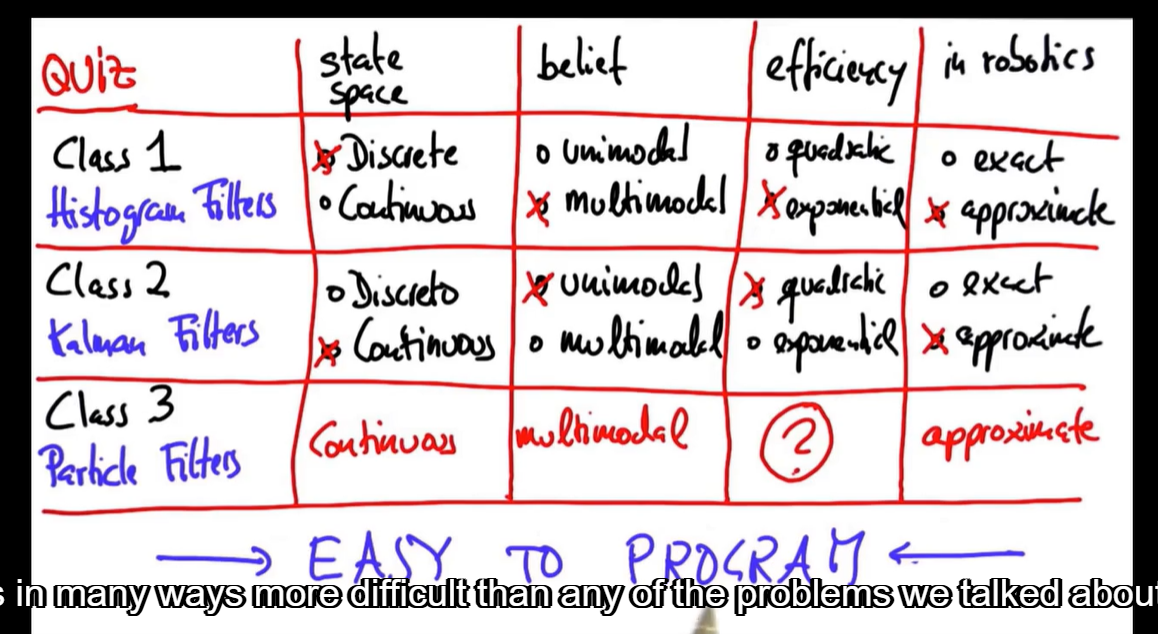

1. Particles: discrete guss where the robot might be
    1. survives in proportion of how consisten 1 of these particles is with a sensor measurement

1. Robot:
    1. can sense the distance to 4 designated landmarks
    1. the distances comprise the measurement vector of the robot
    1. a cyclic world
1. Particle Filter
    1. maintain a set of 1000 random guesses as to where the robt might be 
    1. each dot contains x, y,and heading direction
    1. p[i] robot() (x, y, orient) initialized randomly

In [1]:
from Utilities.robot_pf import *

In [16]:
myrobot = robot()
myrobot = myrobot.move(0.1, 5)
Z = myrobot.sense()

In [17]:
N = 1000
p = []
for i in range(N):
    x= robot()
    x.set_noise(0.05, 0.05, 5.0)
    p.append(x)
print(p)

[[x=52.280 y=35.287 orient=0.2893], [x=83.526 y=97.609 orient=6.2114], [x=0.0750 y=28.005 orient=1.2296], [x=62.903 y=42.129 orient=3.9740], [x=76.744 y=90.058 orient=4.3046], [x=19.400 y=77.468 orient=3.0579], [x=8.7817 y=82.607 orient=4.2972], [x=61.888 y=70.134 orient=2.7453], [x=22.034 y=23.025 orient=2.6567], [x=67.053 y=79.405 orient=0.5956], [x=16.499 y=35.059 orient=2.9414], [x=54.807 y=37.004 orient=0.0473], [x=78.028 y=32.186 orient=4.1748], [x=3.9864 y=74.833 orient=4.0651], [x=92.214 y=27.541 orient=6.1413], [x=81.406 y=97.143 orient=3.1830], [x=74.076 y=86.915 orient=2.2329], [x=3.3961 y=35.395 orient=3.2763], [x=98.096 y=45.680 orient=3.9479], [x=53.242 y=19.659 orient=2.8913], [x=29.553 y=14.533 orient=5.9110], [x=38.587 y=62.946 orient=0.8278], [x=20.118 y=37.615 orient=1.9691], [x=78.546 y=28.798 orient=4.3715], [x=71.756 y=86.329 orient=3.3680], [x=51.036 y=72.757 orient=2.9566], [x=23.836 y=30.481 orient=4.7977], [x=3.1171 y=95.187 orient=1.1021], [x=90.004 y=77.570 

In [18]:
# turn by 0.1 and move by 5.0
p2 = []
for r in p:
    p2.append(r.move(0.1, 5))
p = p2

1. Mismatch of the actual measurement and the predicted measurement leads to importance weight
    1. the larger the weight the more important it is
    1. some of the particles survice
    1. the probability of survival will be proportional to their weight
    1. resampling: randomly drawing N new particles from these old ones with replacement in porportion to their importance wieght

In [19]:

w = [] #reflect the output of the function measurement_prob() applied to the measurement Z 
for r in p:
    w.append(p[i].measurement_prob(Z))
print(w)

[4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.819540777202423e-103, 4.8195407772024

1. Resampling
    1. draw with replacement
    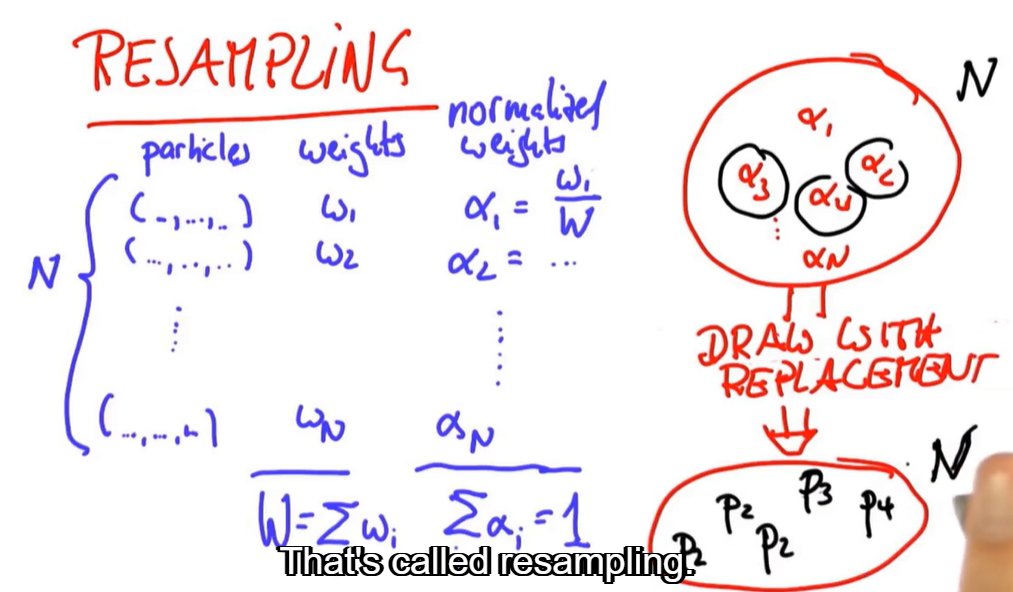

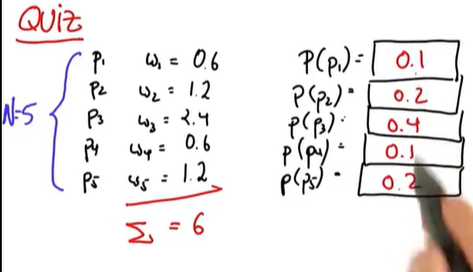

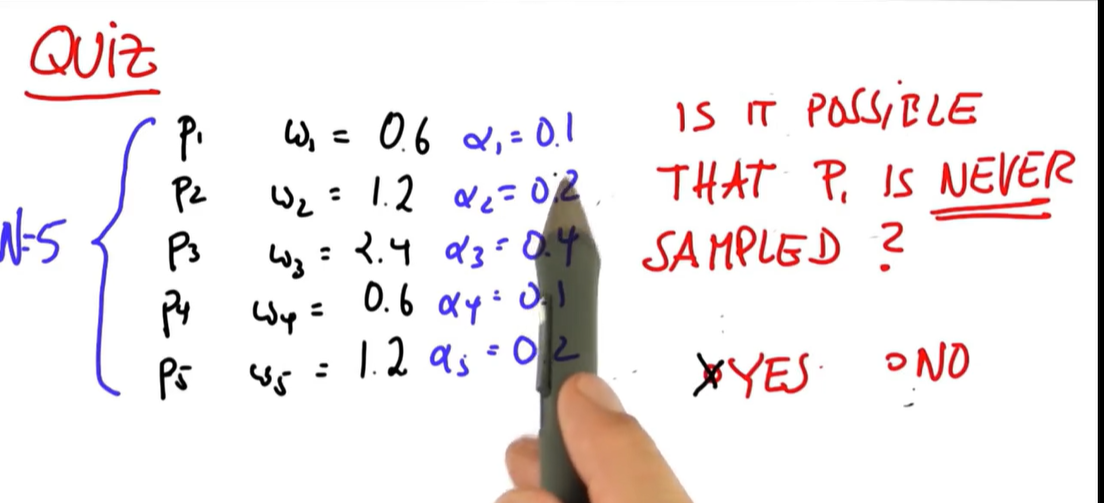

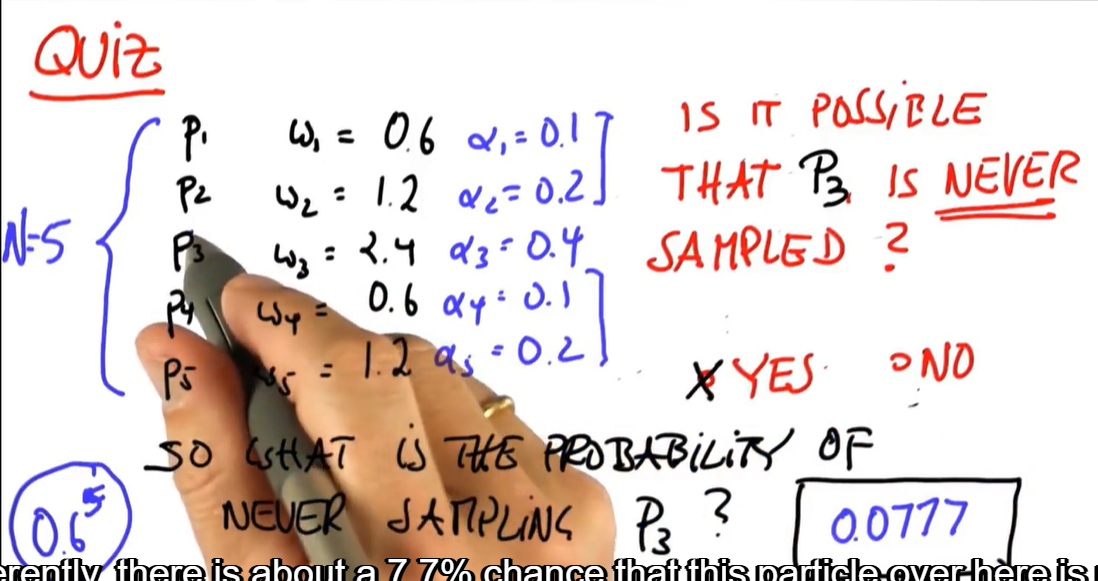

### construct new particle set p3, drawn from P according to the imoportance weights
1. guess a particle index uniformly from teh set of all indeces: $index = U[1...N]$ uniform sample at U from the discrete set of choices of index 1 all the way to N
1. $\beta=0$
1. for i = 1..N
    1. $\beta <- \beta + U\{0..2 * w_{max}\}$
    1. if $w_{index}<\beta$
        1. $\beta = \beta - W_{index}$
        1. $index = index+1$

In [23]:
p3 = []
index = int(random.random()*N)
beta = 0;
mw = max(w)
for i in range(N):
    beta+=random.random()*2*mw
    while(beta>w[index]):
        beta-=w[index]
        index=(index+1)%N
    p3.append(p[index])
p = p3
print(p)

[[x=42.678 y=84.031 orient=5.4341], [x=67.088 y=82.697 orient=3.1959], [x=67.088 y=82.697 orient=3.1959], [x=67.088 y=82.697 orient=3.1959], [x=25.856 y=26.318 orient=6.1751], [x=26.404 y=31.363 orient=6.1296], [x=37.700 y=17.843 orient=2.2855], [x=60.839 y=87.726 orient=1.0897], [x=60.839 y=87.726 orient=1.0897], [x=60.839 y=87.726 orient=1.0897], [x=27.378 y=18.021 orient=3.5940], [x=91.389 y=37.632 orient=1.1549], [x=55.240 y=28.806 orient=0.4737], [x=5.7774 y=25.967 orient=5.0825], [x=79.456 y=64.604 orient=5.9427], [x=95.867 y=62.902 orient=5.2147], [x=1.8631 y=30.255 orient=2.3030], [x=94.133 y=51.399 orient=0.1530], [x=94.133 y=51.399 orient=0.1530], [x=29.639 y=59.426 orient=2.2058], [x=51.444 y=21.242 orient=2.8244], [x=51.444 y=21.242 orient=2.8244], [x=57.194 y=94.012 orient=2.5290], [x=62.755 y=32.099 orient=0.9083], [x=35.100 y=61.033 orient=2.7761], [x=35.100 y=61.033 orient=2.7761], [x=6.2102 y=12.491 orient=4.3735], [x=65.969 y=6.2527 orient=5.1741], [x=65.969 y=6.2527 

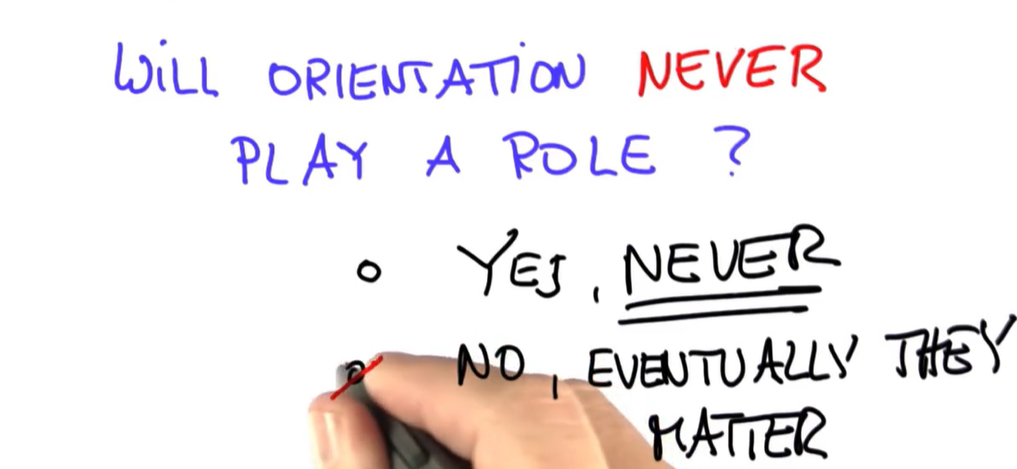

In [ ]:
#Print the overall quality of the solution

In [25]:
print(eval(myrobot.p))

AttributeError: 'robot' object has no attribute 'p'

1. measurement updates
    1. $P(X|Z) \propto P(Z|X)P(X)$ :posterior over state is proportional to, after normalization of probability of the measurement
1. Motion updates
    1. $P(X') = \sum (X'|X)P(X)$
1. $P(X)$: a set of particles
1. $P(Z|X)$: important weights
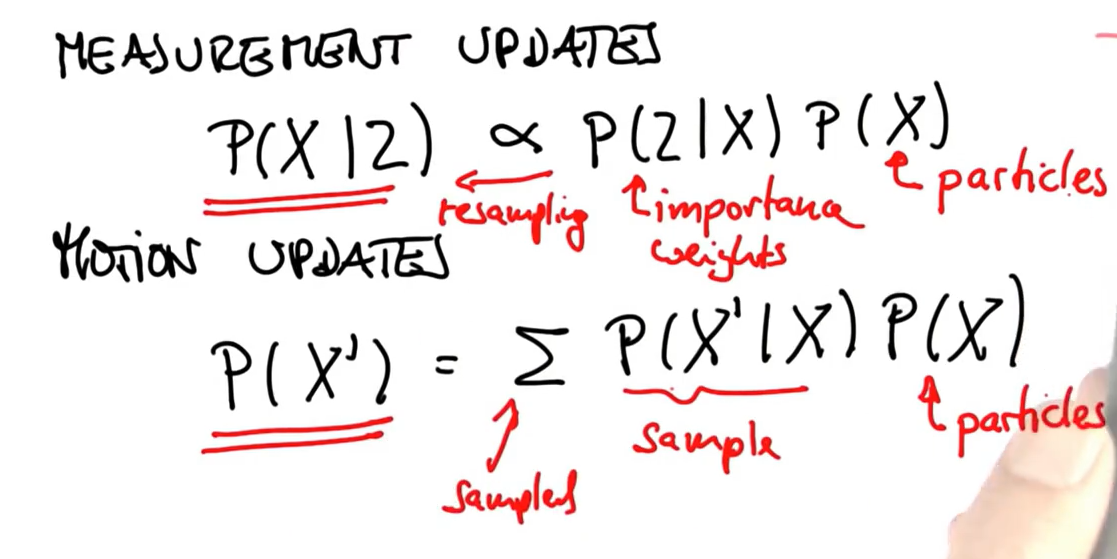

1. Mismatch of the actual measurement and the predicted measurement leads to importance weight
    1. the larger the weight the more important it is
    1. some of the particles survice
    1. the probability of survival will be proportional to their weight
    1. resampling: randomly drawing N new particles from these old ones with replacement in porportion to their importance wieght

### Bike model
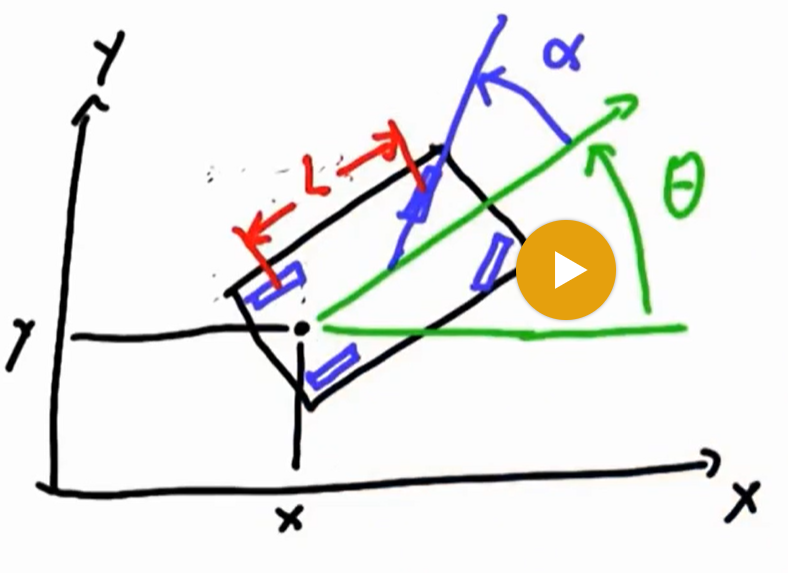
1. state: $x, y, \theta$
1. steering angle: $\alpha$
1. distance: d
1. length: L
1. Turning angle: $\beta = d/L *tan(a)$
1. $R=d/\beta = L/tan(a)$
1. circle center
    1. $cx = x - sin(\theta)R$
    1. $cy = y + cos(\theta)R$
1. $x = cx + sin(\theta+\beta)R$
1. $y = cy - cos(\theta+\beta)R$
1. $\theta = \theta + \beta$